# MIE 1624 Assignment1

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,classification_report
from sklearn import ensemble,metrics
from sklearn.utils import shuffle
from sklearn import datasets
from sklearn import model_selection   
from sklearn.model_selection import GridSearchCV    
from sklearn.svm import SVC 

import warnings


import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

# Read Data

In [2]:
salary = pd.read_csv('Kaggle_Salary.csv')

/Users/hq/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (73,77,114,146,153,171,175,212,224,228,231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
salary.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1,6,"60,000-69,999"


In [4]:
salary.describe()

,Time from Start to Finish (seconds),Q2_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,...,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q10_Encoded
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,...,12497.000000,12497.00000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,14186.510202,-0.963191,29.216932,-0.250940,8.103465,20.657998,25.922621,4.303833,3.934304,262.422101,...,-0.959030,-0.96015,0.146995,-0.432104,-0.024486,-0.075458,-0.396975,-0.762663,0.084420,3.920061
std,72866.379285,0.978525,122.208237,8.257127,51.449272,101.726742,119.957741,33.044706,31.519867,615.567766,...,0.969486,0.93225,10.517404,6.495225,9.436367,9.187520,6.270585,3.395293,9.675712,4.188416
min,67.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,448.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,636.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,1054.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,56.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.000000
max,843612.000000,39.000000,877.000000,137.000000,491.000000,812.000000,935.000000,366.000000,337.000000,2840.000000,...,35.000000,31.00000,162.000000,113.000000,143.000000,142.000000,108.000000,74.000000,144.000000,14.000000


In [5]:
salary.shape

(12497, 248)

In this dataset, there are 12497 samples, 248 questions
There are many duplicate questions, we must deal with them.


# 1.Data Cleaning

## 1.1 Delete

    We first should delete some values, so that we could reduce some running time. We delete the coloum with less time used, since these values are input by users in hurry, it is possible that someone input some fake info. However, at the model trainning below this notebook, errors are always shown unless we delete this, otherwise train data and test data can not fit.

In [6]:
salary.rename(columns={"Time from Start to Finish (seconds)": "TimeUsed"},inplace=True)
#change the name to make this easy to index
#print(salary.shape)
#salary.drop(salary[salary.TimeUsed < 180].index,inplace=True)
#print(salary.shape)
#salary.head()

Since Q10 is already encoded, Q10 is not needed, Q10_bucket is also not needed

In [7]:
salary_to_drop = ['Q10','Q10_buckets']
salary.drop(labels=salary_to_drop, axis=1, inplace=True)

## 1.2 Handle missing values

1. We draw the heatmap to see the number of missing values, which is so large.
2. To do with missing values, we first divided them into single and multiple questions. Like Q4, a single question only has one col. Luckily, there are 'Q11', 'Q14', 'Q15', 'Q19', 'Q22', 'Q23' and all of them can be filled the nan value with mode of this column.

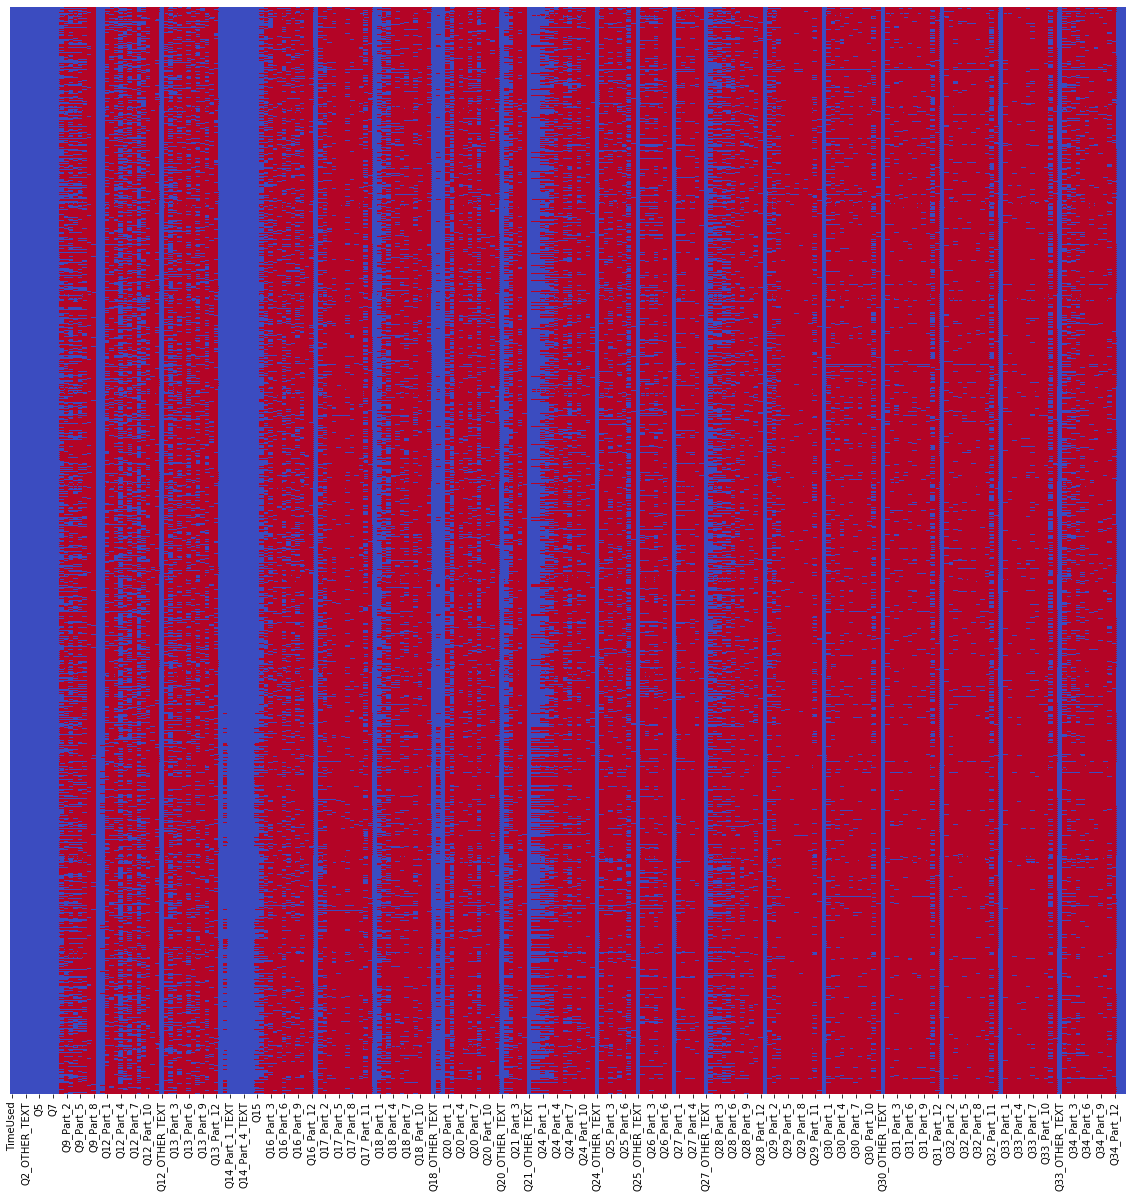

In [8]:
#see all missing heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(salary.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

### get missing data for single & multiple

In [9]:
headers = list(salary.columns.values)
headers
single=[]
multiple=[]
for col in headers:
    if "Part" not in col and "OTHER" not in col and"Time" not in col:
        #print(col)
        single.append(col)
    else:
        if "Part" not in col and "Time" not in col:
                multiple.append(col)
#print(single)
#print(multiple)
#print(column_headers)
#print(len(column_headers))
#print(len(single))
#print(len(multiple))

In [10]:
single_number = salary.isnull().sum().sort_values(ascending=False)
single_missing_data = pd.concat([single_number], axis=1, keys=['Total'])
single_missing=single_missing_data.loc[ single, : ]
single_missing.sort_values(by="Total" , ascending=False)

,Total
Q23,1956
Q22,1947
Q19,1844
Q15,1075
Q14,1045
Q11,247
Q1,0
Q2,0
Q3,0
Q4,0


In [11]:
multiple_number = salary.isnull().sum().sort_values(ascending=False)
multiple_missing_data = pd.concat([multiple_number], axis=1, keys=['Total'])
multiple_missing=single_missing_data.loc[ multiple, : ]
multiple_missing.sort_values(by="Total" , ascending=False)

,Total
Q2_OTHER_TEXT,0
Q24_OTHER_TEXT,0
Q33_OTHER_TEXT,0
Q32_OTHER_TEXT,0
Q31_OTHER_TEXT,0
Q30_OTHER_TEXT,0
Q29_OTHER_TEXT,0
Q28_OTHER_TEXT,0
Q27_OTHER_TEXT,0
Q26_OTHER_TEXT,0


    Based on the percentage of missing values in each column, we have several approaches to handling missing values. We fill them with their modes

Calculate the number of missing value of non-multiple choice

In [12]:
fill_with_mode = []
for col in salary.columns:
    NullNum = salary[col].isnull().sum()
    if salary.shape[0]>NullNum>0:
        #print(NullNum)
        if not (("Part" in col)or("OTHER" in col)or("Encoded" in col)or("buckets" in col)or("Time" in col)):
            fill_with_mode.append(col)
print(fill_with_mode)

['Q11', 'Q14', 'Q15', 'Q19', 'Q22', 'Q23']


We view the question to see if they can fill in with mode

In [13]:
questions = pd.read_csv('multiple_choice_responses.csv',nrows=1)
print(questions.Q11[0])
print(questions.Q14[0])
print(questions.Q15[0])
print(questions.Q19[0])
print(questions.Q22[0])
print(questions.Q23[0])

Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice
How long have you been writing code to analyze data (at work or at school)?
What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
Have you ever used a TPU (tensor processing unit)?
For how many years have you used machine learning methods?


    Print out all the questions for those questions

    All five questions are able to use their mode to replace the missing value
    Q14 has part but it is save to ignore them

In [14]:
for col in fill_with_mode:
    salary[col].fillna(salary[col].mode()[0],inplace=True)

We finished processing for 'Q11', 'Q14', 'Q15', 'Q19', 'Q22', 'Q23', we can drop some of their related columns

In [15]:
L=[]
features_to_drop=[]
for s in fill_with_mode:
    for col in headers:
        if s in col:
            L.append(col)
for x in L:
     if x not in fill_with_mode:
            features_to_drop.append(x)
print(features_to_drop)

['Q14_Part_1_TEXT', 'Q14_Part_2_TEXT', 'Q14_Part_3_TEXT', 'Q14_Part_4_TEXT', 'Q14_Part_5_TEXT', 'Q14_OTHER_TEXT', 'Q19_OTHER_TEXT']


In [16]:
salary.drop(labels=features_to_drop, axis=1, inplace=True)

In [17]:
salary.shape

(12497, 239)

### 1.2 Encode general categorical features
    There are some categorical features like "Current Role" which has "Software Engineer","Data Scientist"... So we can encode them. Dummy can be applied. More columns will be applied at behind. When dummy is finished, we should drop the original column.

In [18]:
Q5=salary.Q5
#print(Q5)# for future analyse
Q2=salary.Q2
#print(Q2)

In [19]:
DummyColumns = ['Q2','Q5','Q14','Q19','Q8']
for col in DummyColumns:
    salary= pd.get_dummies(data=salary, columns=[col])

In [20]:
features_to_drop = ['Q2_OTHER_TEXT','Q5_OTHER_TEXT']
salary.drop(labels=features_to_drop, axis=1, inplace=True)

In [21]:
salary.shape

(12497, 270)

In [22]:
# print(Salary['Q3'].value_counts())
val_counts = salary['Q3'].value_counts()
value_mask = salary['Q3'].isin(val_counts.index[val_counts < 50])
salary.loc[value_mask,'Q3'] = "Other"

salary = pd.get_dummies(data=salary, columns=['Q3'])

In [23]:
#salary.describe

### Q1.3 Handle special categorical features

    There are lots of special categorical features, we can change them into certain values. We can use their means to apply. However, for the largest range like "PhD" etc. we can give them a higher value, since their mean can't equal to its minimum value.

In [24]:
def Range_Normalize(value):
    if isinstance(value, str):
        if '-' in value:
            temp = value.split('-')
            return (float(temp[0])+float(temp[1]))/2
        if '+' in value:
            a = value.split('+')
            return float(a[0])
        else:
            return value
    else:
        return value

In [25]:
salary.Q1.unique()
salary['Q1_age'] = salary['Q1'].apply(Range_Normalize)
salary.drop(labels='Q1', axis=1, inplace=True)

In [26]:
print(questions.Q4[0])
def Q4Range(value):
    Q4_Range = {   
    'I prefer not to answer': 0,
    'No formal education past high school': 1,
    'Some college/university study without earning a bachelor’s degree': 2, 
    'Professional degree': 3,
    'Bachelor’s degree': 4,
    'Master’s degree': 6, 
    'Doctoral degree': 9,
    }
    return Q4_Range[value]
salary['Q4_NORMAL'] = salary['Q4'].apply(Q4Range)
salary.drop(['Q4'],axis=1,inplace=True)

What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


In [27]:
print(questions.Q6[0])
def Q6Range(value):
    Range = {   
    '0-49 employees': 50,
    '50-249 employees': 250,
    '250-999 employees': 1000, 
    '1000-9,999 employees':10000,
    '> 10,000 employees': 100000,
    }
    return Range[value]
salary['Q6_NORMAL'] = salary['Q6'].apply(Q6Range)
salary.drop(['Q6'],axis=1,inplace=True)

What is the size of the company where you are employed?


In [28]:
print(questions.Q7[0])
def Q7Range(value):
    Range = {   
    '0': 0,
    '1-2':2, 
    '3-4':4,
    '5-9':9,
    '10-14':15,
    '15-19':20,
    '20+': 40,
    }
    return Range[value]
salary['Q7_NORMAL'] = salary['Q7'].apply(Q7Range)
salary.drop(['Q7'],axis=1,inplace=True)

Approximately how many individuals are responsible for data science workloads at your place of business?


In [29]:
print(questions.Q11[0])
def Q11Range(value):
    Range= {   
    '$0 (USD)': 0,
    '$1-$99': 50,
    '$100-$999': 500, 
    '$1000-$9,999': 5000,
    '$10,000-$99,999': 55000, 
    '> $100,000 ($USD)': 100000,
    }
    return Range[value]
salary['Q11_NORMAL'] = salary['Q11'].apply(Q11Range)
salary.drop(['Q11'],axis=1,inplace=True)

Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?


In [30]:
print(questions.Q15[0])
def Q15Range(value):
    Range= {   
    'I have never written code': 0,
    '< 1 years': 0.5,
    '1-2 years': 1.5, 
    '3-5 years':4,
    '5-10 years':7.5, 
    '10-20 years': 15,
    '20+ years':40
    }
    return Range[value]
salary['Q15_NORMAL'] = salary['Q15'].apply(Q15Range)
salary.drop(['Q15'],axis=1,inplace=True)

How long have you been writing code to analyze data (at work or at school)?


In [31]:
print(questions.Q22[0])
def Q22Range(value):
    Range= {   
    'Never': 0,
    'Once': 1,
    '6-24 times': 15, 
    '2-5 times':4,
    '5-10 years':8, 
    '> 25 times': 50,
    }
    return Range[value]
salary['Q22_NORMAL'] = salary['Q22'].apply(Q22Range)
salary.drop(['Q22'],axis=1,inplace=True)

Have you ever used a TPU (tensor processing unit)?


In [32]:
print(questions.Q23[0])
def Q23Range(value):
    Range= {   
    '< 1 years': 0.5,
    '1-2 years': 1.5,
    '2-3 years': 2.5, 
    '3-4 years':3.5,
    '4-5 years':4.5, 
    '5-10 years': 7.5,
    '10-15 years':12.5,
    '20+ years':40,
    }
    return Range[value]
salary['Q23_NORMAL'] = salary['Q23'].apply(Q23Range)
salary.drop(['Q23'],axis=1,inplace=True)

For how many years have you used machine learning methods?


In [33]:
#salary

### Q1.4 Handle binary features

    For all "text" we just check if there are any value inside;
    For all "part", all the data inside are binary, we just need to make it 1 or 0;

In [34]:
headers = list(salary.columns.values)
text=[]
for col in headers:
    if "TEXT"  in col:
        text.append(col)    
#print(text)
salary.drop(labels=text, axis=1, inplace=True)

In [35]:
import math
def Binarize(value):
    if isinstance(value,str):
        return 1
    else:
        if value == 0 or math.isnan(value):
            return 0
        else:
            return 1

headers = list(salary.columns.values)
L=[]
#print(headers)
for col in headers:
    if ("Part" in col):
        L.append(col)
for col in L:
    salary[col] = salary[col].apply(Binarize)

In [36]:
headers = list(salary.columns.values)
#print(headers)
print(salary.shape)

(12497, 293)


In [37]:
salary

,TimeUsed,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,...,Q3_United States of America,Q3_Viet Nam,Q1_age,Q4_NORMAL,Q6_NORMAL,Q7_NORMAL,Q11_NORMAL,Q15_NORMAL,Q22_NORMAL,Q23_NORMAL
0,510,0,0,0,0,0,0,0,0,1,...,0,0,23.0,6,10000,0,0,1.5,0,1.5
1,423,1,1,1,1,0,0,0,0,0,...,0,0,42.0,3,100000,40,100000,0.0,0,0.5
2,391,0,0,0,0,0,0,0,0,0,...,0,0,42.0,6,100000,40,55000,1.5,1,2.5
3,392,0,0,0,0,0,0,0,0,0,...,0,0,23.0,4,50,0,0,0.5,0,0.5
4,470,0,0,1,0,0,1,0,0,0,...,0,0,52.0,6,50,4,55000,40.0,0,12.5
5,529,1,0,0,0,1,1,0,0,0,...,0,0,23.0,6,250,40,500,4.0,15,2.5
6,624,1,0,1,1,0,0,0,0,0,...,1,0,23.0,4,100000,40,0,4.0,1,3.5
7,691,0,0,0,0,0,0,0,1,0,...,0,0,57.0,6,50,2,500,7.5,0,0.5
8,459,1,0,0,0,0,0,0,0,0,...,0,0,32.0,6,50,9,5000,7.5,4,4.5
9,397,1,1,1,1,0,0,0,0,0,...,0,0,32.0,4,250,9,5000,7.5,0,4.5


# 2. Exploratory data analysis

In [38]:
data = pd.concat([salary['Q1_age'],salary['Q10_Encoded']], axis=1)

data=data.sort_values(by=['Q10_Encoded'])
#print(data)

Text(0.5, 0, 'Age')

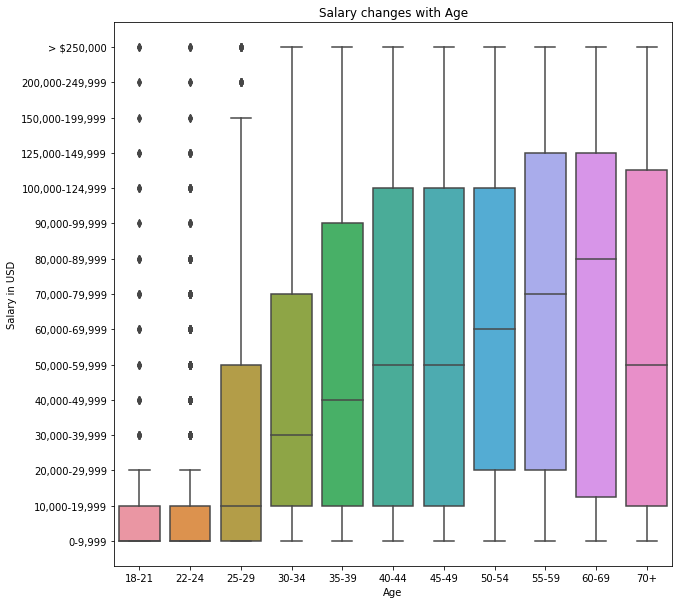

In [39]:
f,ax=plt.subplots(figsize=(10, 10))
sorted_keys = {'18-21':19.0,'22-24':23.0,'25-29':27.0,'30-34':32.0,'35-39':37.0,'40-44':42.0,
               '45-49':47.0,'50-54':52.0,'55-59':57.0,'60-69':64.0,'70+':70.0}
sns.boxplot(x='Q1_age', y="Q10_Encoded", data=data)
plt.xticks(plt.xticks()[0], sorted_keys)
plt.yticks(np.arange(15),
    ('0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999',
    '60,000-69,999',
    '70,000-79,999', 
    '80,000-89,999', 
    '90,000-99,999',
    '100,000-124,999',
    '125,000-149,999',
    '150,000-199,999',
    '200,000-249,999',
    '> $250,000'))
ax.set_ylabel('Salary in USD')
ax.set_title("Salary changes with Age")
ax.set_xlabel("Age")

    We draw a boxplot to show the salary changes with age. It is obvious that as age grows, salary increases. The lower salary in each range of age does not changes a lot. Means are clear enough to show the increase as age grows. This feature cannot be dropped.

In [40]:
data = pd.concat([Q5,salary['Q10_Encoded']],axis=1)
data=data.sort_values(by=['Q10_Encoded'])
#print(data)

Text(0.5, 0, 'Jobs')

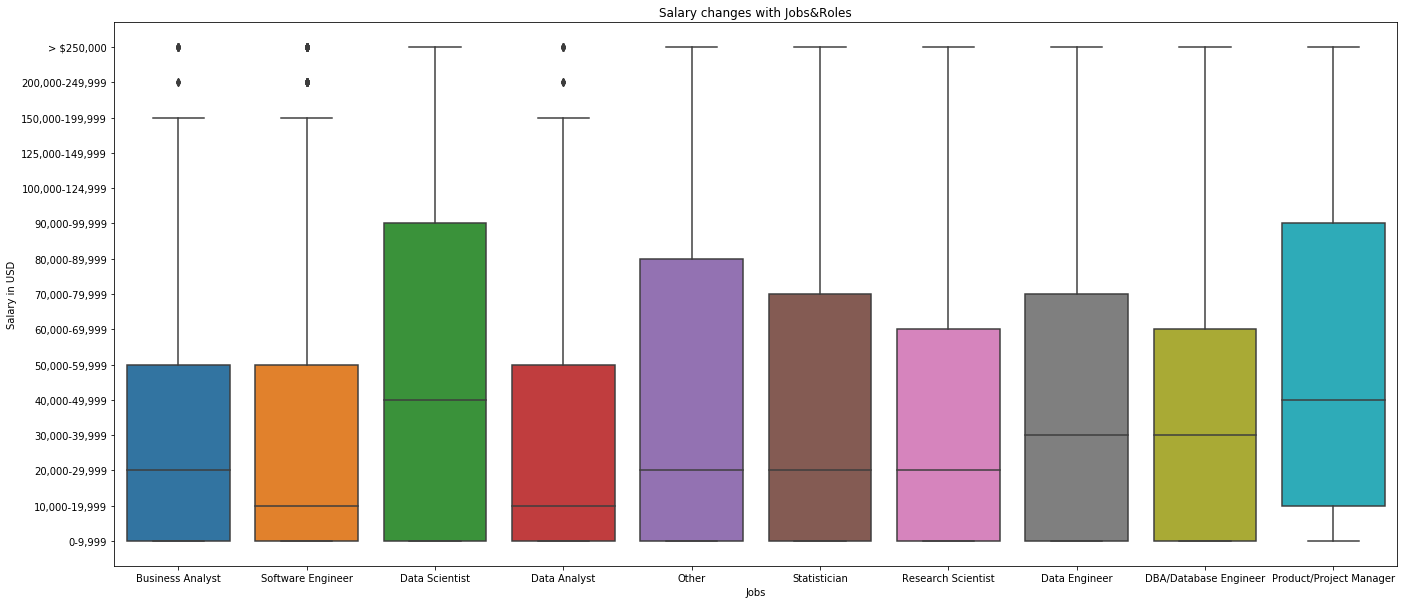

In [41]:
f,ax=plt.subplots(figsize=(23, 10))
sns.boxplot(x='Q5', y="Q10_Encoded", data=data)
plt.yticks(np.arange(15),
    ('0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999',
    '60,000-69,999',
    '70,000-79,999', 
    '80,000-89,999', 
    '90,000-99,999',
    '100,000-124,999',
    '125,000-149,999',
    '150,000-199,999',
    '200,000-249,999',
    '> $250,000'))
ax.set_title("Salary changes with Jobs&Roles")
ax.set_ylabel('Salary in USD')
ax.set_xlabel("Jobs")

    This diagram shows the salary changes with different jobs. Clearly, data scientist and product manager earns more. If someone is a software engineer, then he is really possible that earn less than product manager. The jobs can determine the salary in DS&ML field. Data scientist and product manager may reponsible for providing algorithm, while software engineer just implements their algorithm.

### Diploma

In [42]:
data = pd.concat([salary['Q4_NORMAL'],salary['Q10_Encoded'],Q2], axis=1)
for i in data.Q4_NORMAL:
    if i==0:
        data.drop(data[data.Q4_NORMAL==0].index,inplace=True)
for i in data.Q2:
    if i=="Prefer not to say" or i=="Prefer to self-describe":
        data.drop(data[data.Q2=="Prefer not to say"].index,inplace=True)
        data.drop(data[data.Q2=="Prefer to self-describe"].index,inplace=True)
        #we delete this because this two parts in this dataset varies too much from Male and Female, not because other reasons
#print(data)

We delete the ==0 (I prefer not to answer)

Text(0.5, 0, 'Diploma')

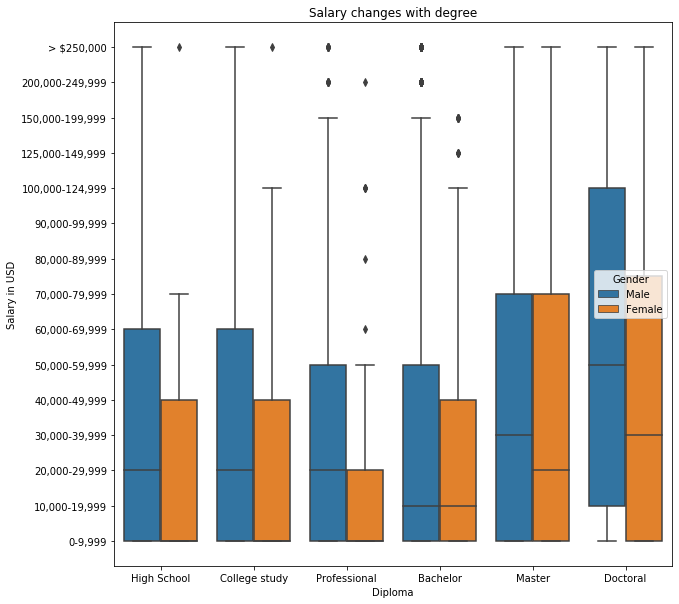

In [43]:
data.rename(columns={"Q2": "Gender"},inplace=True)
f,ax=plt.subplots(figsize=(10, 10))
ax.set_axisbelow(True)
sns.boxplot(x='Q4_NORMAL', y="Q10_Encoded",hue="Gender", data=data,ax=ax)
plt.yticks(np.arange(15),
    ('0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999',
    '60,000-69,999',
    '70,000-79,999', 
    '80,000-89,999', 
    '90,000-99,999',
    '100,000-124,999',
    '125,000-149,999',
    '150,000-199,999',
    '200,000-249,999',
    '> $250,000'))
Q4_Range = {   
    'High School': 1,
    'College study': 2, 
    'Professional': 3,
    'Bachelor': 4,
    'Master': 6, 
    'Doctoral': 9,
    }
plt.xticks(plt.xticks()[0], Q4_Range)
ax.set_title("Salary changes with degree")
ax.set_ylabel('Salary in USD')
ax.set_xlabel("Diploma")

    Degrees can changes the salary earned. Especially for PhD students.
    Generally, Male earns more than female. The gender  is decisive in DS&ML field, which I think is unfair.

## 2.2 Visualize the order of feature importance

We draw the heat map, to see the Top10 correlated features.

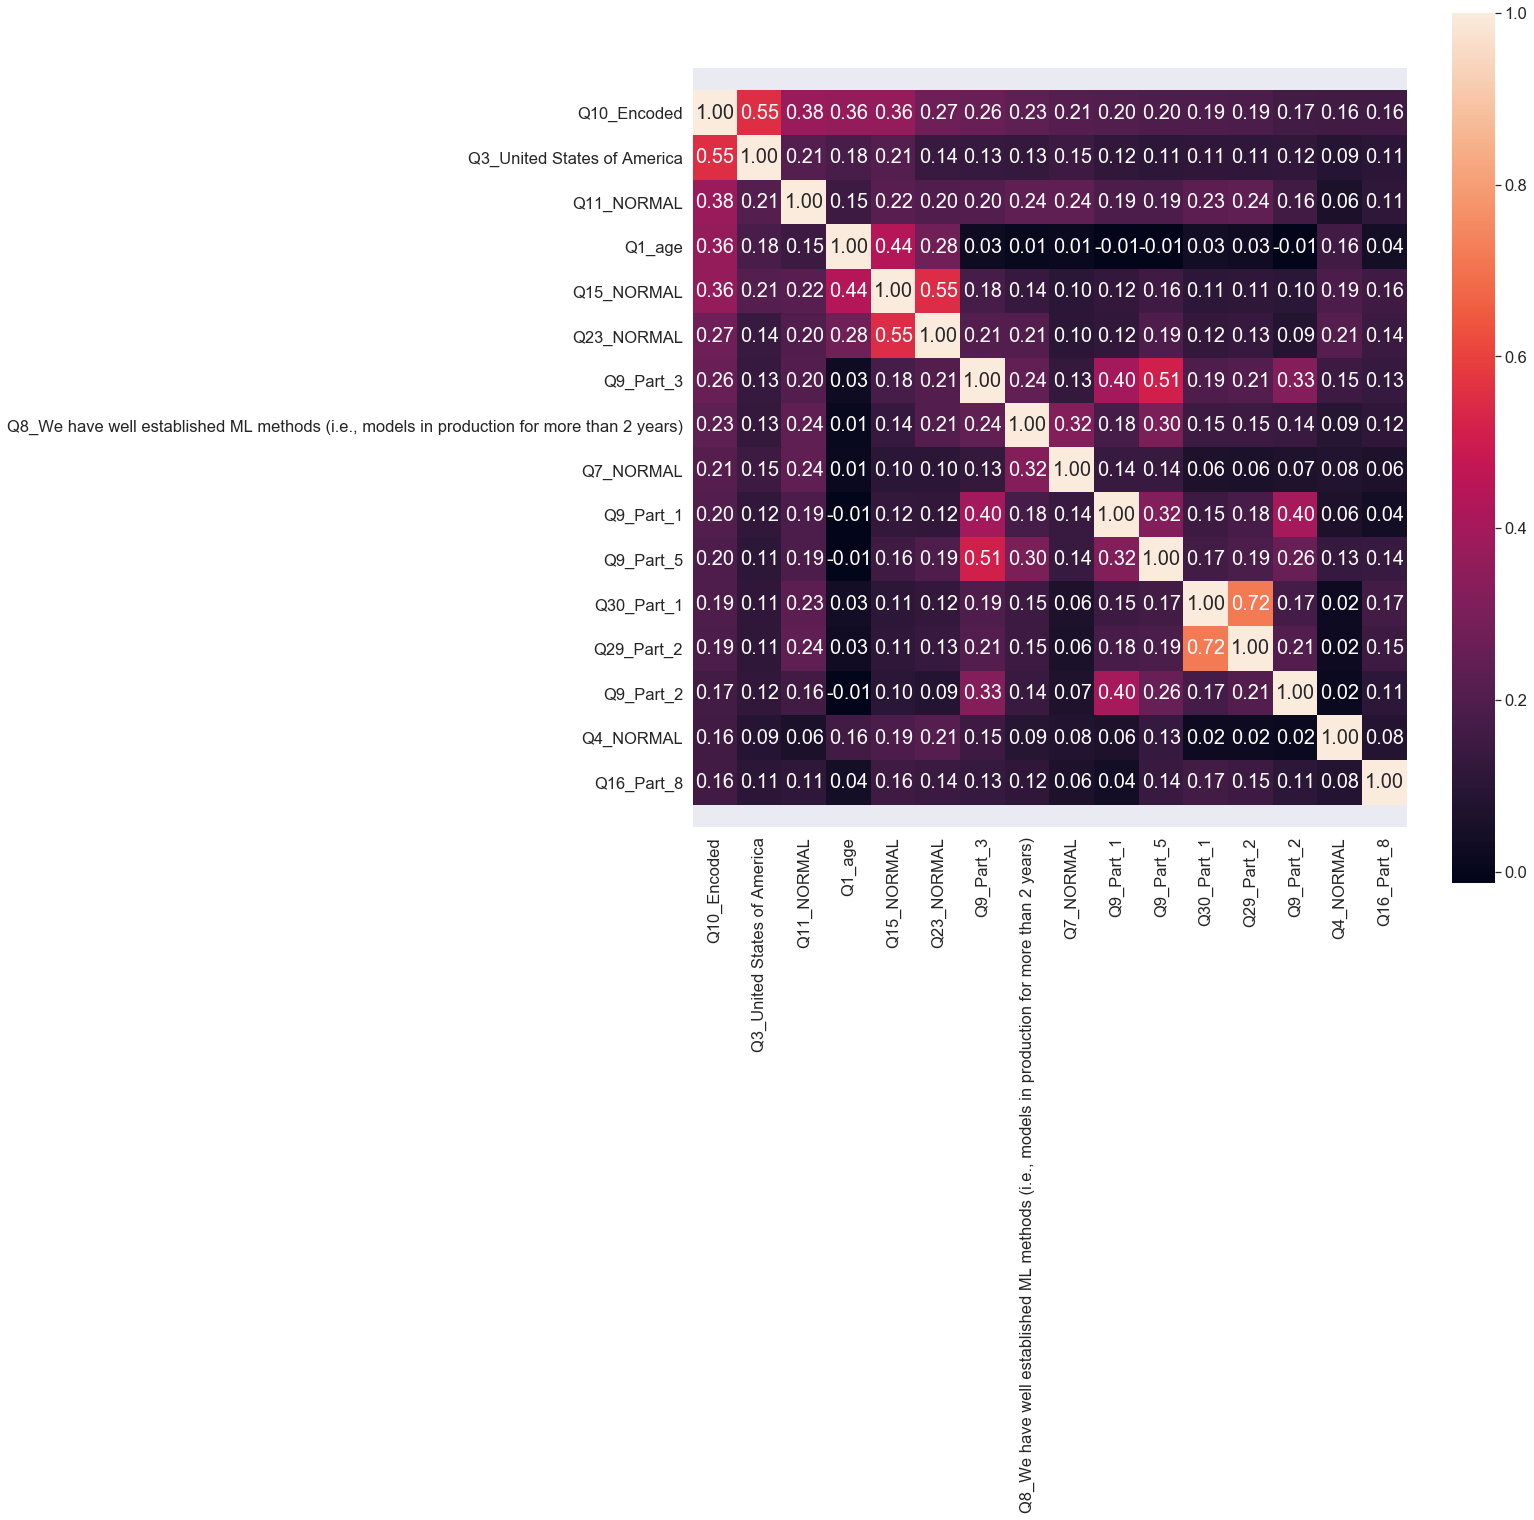

In [44]:
k = 16 #number of variables for heatmap
plt.figure(figsize=(16,16))
corrmat = salary.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'Q10_Encoded')['Q10_Encoded'].index
cm = np.corrcoef(salary[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top=hm.get_ylim()
hm.set_ylim(bottom+0.5,top-0.5)
plt.show()

# 3. Feature Selection

### 3.1 Manully choose Top10 whose corralation is larger than 0.2

In [45]:
X=salary[cols[1:13]]
Y=salary['Q10_Encoded']
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.3, random_state=20)
print(X.shape,Y.shape)

(12497, 12) (12497,)


### 2. Lasso

    Lasso (least absolute shrinkage and selection operator) is part of feature engineering. It is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

In [46]:
X = salary.drop(['Q10_Encoded'],axis=1)
Y = salary['Q10_Encoded']
print(X.shape,Y.shape)

(12497, 292) (12497,)


In [47]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_Train, Y_Train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X, Y)

/Users/hq/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [48]:
coef = pd.Series(model_lasso.coef_, index = X.columns)
coef.head()

TimeUsed     9.788426e-08
Q9_Part_1    1.699506e-01
Q9_Part_2   -5.494352e-03
Q9_Part_3    3.139223e-01
Q9_Part_4   -1.872830e-03
dtype: float64

In [49]:
print("Lasso picked " + str(sum(abs(coef) >= 0.05)) + " variables and eliminated the other " +  str(sum(abs(coef) < 0.05)) + " variables")

Lasso picked 191 variables and eliminated the other 101 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

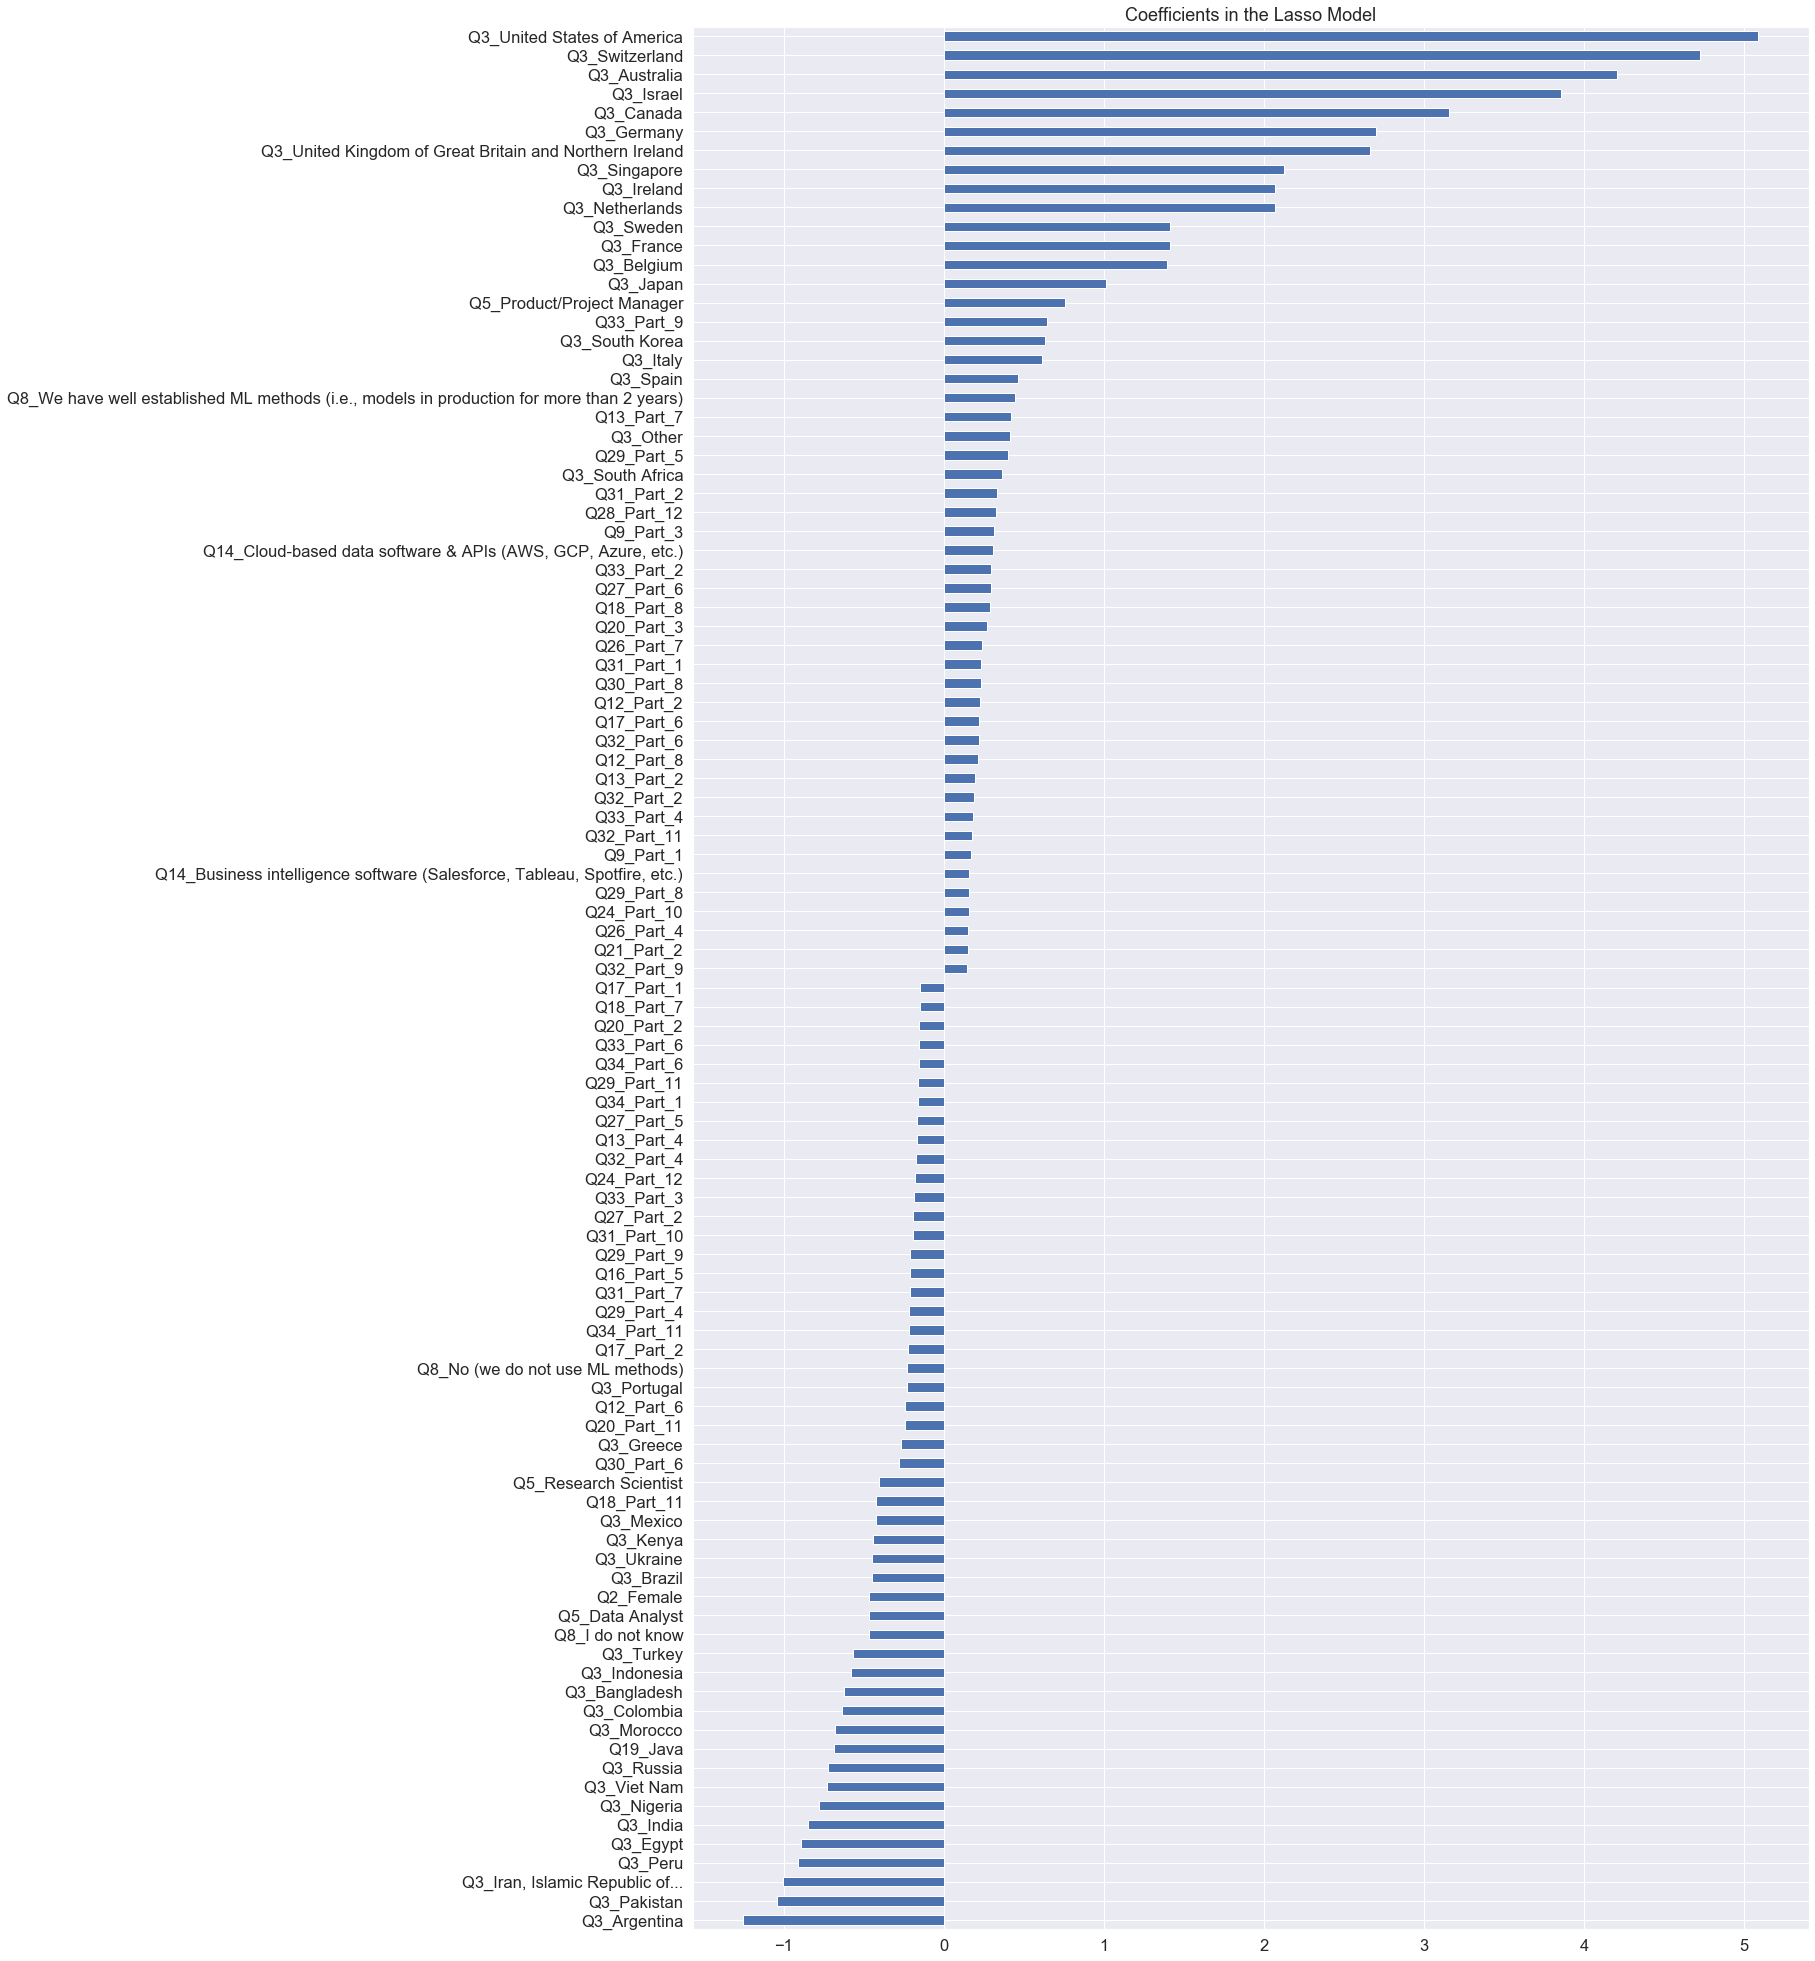

In [50]:
imp_coef = pd.concat([coef.sort_values().head(50),
                     coef.sort_values().tail(50)])
plt.rcParams['figure.figsize'] = (20, 35)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

    In lasso, Q3(country) dominant too much in this model, so I will not use Lasso.

### 3.3 PCA

    We use PCA to perfrom Dimensionality reduction.
    Principal component analysis can convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. It can efficiently reduce dimension while still keep the important features and variance.

In [51]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [52]:
sel = PCA(n_components=70).fit(X)
X = sel.transform(X)

In [53]:
print(X.shape)
print(Y.shape)

(12497, 70)
(12497,)


# 4. Model implementation

    Implement logistic regression algorithm on the training data using 10-fold cross-validation. How does your model accuracy compare across the folds? What is average and variance of accuracy for folds? Treating each value of hyperparameter(s) as a new model, which model performed best? Give the reason based on bias-variance trade-off. An output of your algorithm should be a probability of belonging to each of the salary buckets. Apply scaling/normalization of features, if necessary.

## 4.1 Standardize train set

In [54]:
standardx=StandardScaler()
standardy=StandardScaler()
X=standardx.fit_transform(X)
#pd.DataFrame(X)

## 4.2 Split the data and the labels

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=80, test_size=0.3)

## 4.3 Logistic Regression Model

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
warnings.filterwarnings("ignore", category=FutureWarning)
model = LogisticRegression(C=1,solver='lbfgs',multi_class='auto', penalty="l2",dual=False)    
model.fit(X_train, Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
prediction = model.predict(X_test)
accuracy_of_default=accuracy_score(Y_test, prediction)
print("This model got an accuracy of {}% on the testing set".format(round(accuracy_of_default*100,4)))

This model got an accuracy of 34.72% on the testing set


## 4.4 Logistic Regression with 10-fold Cross Validation

    KFold Cross Validation is a common method where the training set is split into k equal sizes. Then of the k subsamples, a single sample is used for testing, and the remaining k-1 samples are used for training. This process continues k times, and each time a different sample is used for testing. This results in each sample being tested once. At the end of this we get 10 accuracies for the model and, from this, we can get the average accuracy, and the standard deviation of the accuracy. The higher the average accuracy, the lower the bias. The lower the standard deviation, the lower the variance. This better represents the true performance of the model on the training set.

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
model = LogisticRegression()
ifold=1
test_errors = []
train_errors = []
accuracy = np.zeros(10)
np_idx = 0
target_names = ['0-9,999', '10,000-19,999', '20,000-29,999','30,000-39,999','40,000-49,999',
                '50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999',
                '100,000-124,999','125,000-149,999','150,000-199,999','200,000-249,999','>250,000']

In [59]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
kfolds.get_n_splits(X)
for train_idx, test_idx in kfolds.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]


    model.fit(X_train, Y_train)
    
    predictions = model.predict(X_test)
    report=classification_report(Y_test, predictions, target_names=target_names, output_dict=True)

    ACC=accuracy_score(Y_test, predictions)

    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))  
print("-------------------------------------------")
print ("Average Accuracy of 10-Fold: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

/Users/hq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fold 1: Accuracy: 0.334%
Fold 2: Accuracy: 0.361%


/Users/hq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fold 3: Accuracy: 0.338%


/Users/hq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fold 4: Accuracy: 0.334%
Fold 5: Accuracy: 0.343%
Fold 6: Accuracy: 0.349%
Fold 7: Accuracy: 0.341%
Fold 8: Accuracy: 0.376%
Fold 9: Accuracy: 0.343%
Fold 10: Accuracy: 0.336%
-------------------------------------------
Average Accuracy of 10-Fold: 34.568%(1.268%)


/Users/hq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Treating each value of hyperparameter(s) as a new model, which model performed best

Plot the mean accuracy, the "learning curve", of the classifier on both the training and validation dataset

In [60]:
def learning_curves(estimator, x_input, y_input, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, x_input, y_input, train_sizes =train_sizes,cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    test_scores_mean = -validation_scores.mean(axis = 1)
    
    train_scores_mean= np.sqrt(train_scores_mean)
    test_scores_mean= np.sqrt(test_scores_mean)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, test_scores_mean, label = 'Testing error')
    #print(train_scores_mean)
    #print(validation_scores_mean)

    plt.ylabel('RMSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.legend()

In [61]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy'):
    
    plt.figure(figsize=(7,7))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    
    return plt

### Learning Curve

<module 'matplotlib.pyplot' from '/Users/hq/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

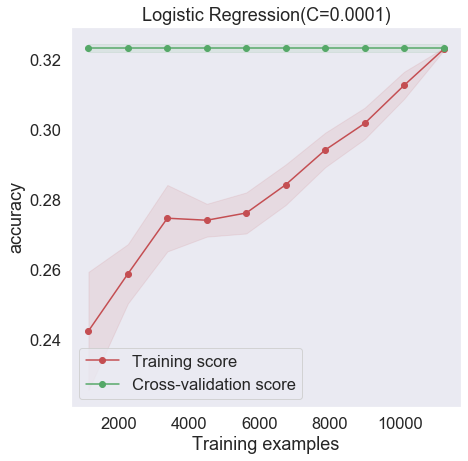

In [62]:
c_large =LogisticRegression(solver='lbfgs',C=0.0001, multi_class='auto', penalty="l2",dual=False)
plot_learning_curve(c_large,'Logistic Regression(C=0.0001)', X, Y, cv=10)

    Change c to less then this model is overfitting, learning rate is less then overfit the training data, cross validation score does not change.

<module 'matplotlib.pyplot' from '/Users/hq/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

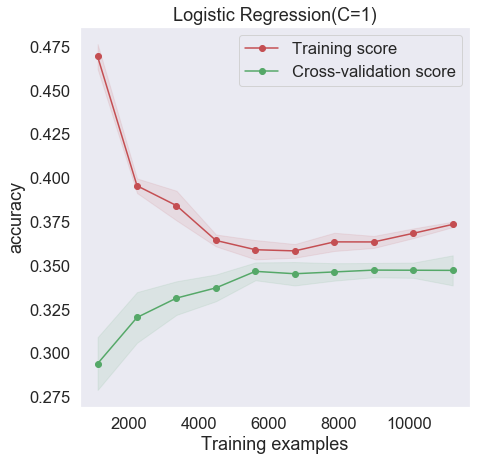

In [63]:
c_best =LogisticRegression(solver='lbfgs',C=1, multi_class='auto', penalty="l2",dual=False,max_iter=1000)
plot_learning_curve(c_best,'Logistic Regression(C=1)', X, Y, cv=10)

/Users/hq/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<module 'matplotlib.pyplot' from '/Users/hq/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

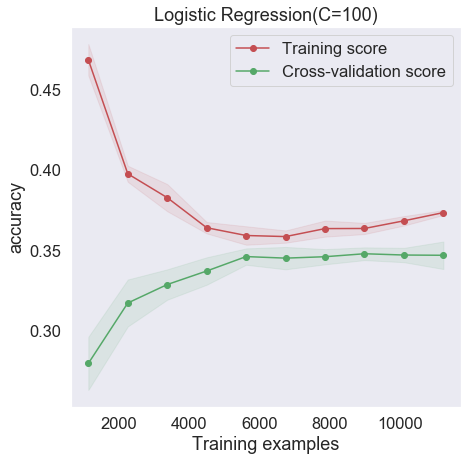

In [64]:
c_large =LogisticRegression(solver='lbfgs',C=100, multi_class='auto', penalty="l2",dual=False,max_iter=1000)
plot_learning_curve(c_large,'Logistic Regression(C=100)', X, Y, cv=10)

    We want a model with low bias and low variance.

    From the three imgaes above, we varied different C. 
    With small C, the model is overfitting. The training score is close to testing score, really high above, high bias.

    With large C, the gap between train and test score are close sitimuously, this is low variance and high bias. Model is underfitted when we have a high bias. For low variance and high bias, we need to improve our model complexity.

# 5. Model Tuning

    We use grid search based on a metric, we change the C values and draw the diagram. Since C always return the less error <10, thus we reduce step size as C is small

    We builds several models with all the parameter combinations specified, and runs cross validation to return the set of parameters that had the highest cv score on the validation set.

## 5.1 Grid Search

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=50)

In [66]:
steps_c=np.array([0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                  1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,
                  2,2.05,2.1,2.15,2.2,2.25,2.3,2.35,2.4,2.45,2.5,2.55,2.6,2.65,2.7,2.75,2.8,2.85,2.9,2.95,
                  3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
                  4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
                  5,6,7,8,9,10,50,100,200])
def tunec(steps_c):
    trainErrC = np.zeros(steps_c.shape)
    testErrC = np.zeros(steps_c.shape)
    for i, step in enumerate(steps_c):
        # Create model instance
        model_c_tune=LogisticRegression(solver='lbfgs',C=step, multi_class='auto', penalty="l2",dual=False,max_iter=10000)
        # Train model
        model_c_tune.fit(X_train, Y_train)
    
        # Make Predictions
        y_train_pred = model_c_tune.predict(X_train)
        y_test_pred = model_c_tune.predict(X_test)
    
        y_train_pred=y_train_pred.reshape(-1,1)
        y_test_pred=y_test_pred.reshape(-1,1)
    
        # Calculate Error
        trainErrC[i] = np.sqrt(mean_squared_error(Y_train, y_train_pred))
        testErrC[i] = np.sqrt(mean_squared_error(Y_test, y_test_pred))


    plt.figure(figsize=(5,5))
    plt.plot(np.log(steps_c),trainErrC,'r',label='Training Error')
    plt.plot(np.log(steps_c),testErrC,'g',label='Testing Error')

    test_loss_min=testErrC.min()
    test_loss_min=testErrC.min()
    index=testErrC.argmin() 
    minC = steps_c[index]

    #Annotate the plot:plt.annotate(text,pointing coordinates,text coordinates,arrowproperty={})
    plt.annotate('Minimum Test Loss (%.4f) / %.4f C' % (test_loss_min, minC),xy=(minC,test_loss_min),xytext=(minC,test_loss_min),arrowprops=dict(width=1,headwidth=2,facecolor='r',shrink=0.05))

    plt.title("RMSE-C")
    plt.xlabel("Log(C)")
    plt.ylabel("RMSE")
    plt.legend(loc=1)
    print("Test Error: ",test_loss_min)
    print("Best C value: %.4f C" %minC)
    return minC

Test Error:  3.8116276970790612
Best C value: 0.3000 C


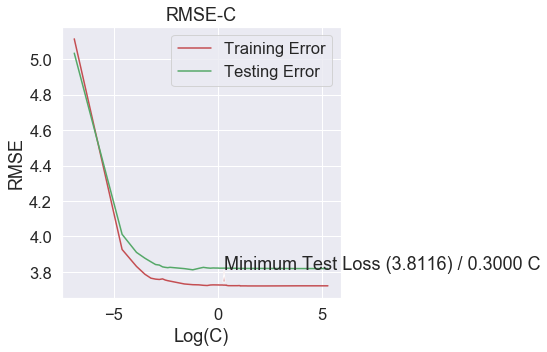

In [67]:
minC=tunec(steps_c)

    We have the best C value at 0.3

In [68]:
#have to re-trian model with C=1
model = LogisticRegression(C=1)    
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy=accuracy_score(Y_test, prediction)
print(accuracy)

0.34966993398679735


## 5.2 New Model with C from Grid Search

In [69]:
model2 = LogisticRegression(C=minC)
model2.fit(X_train, Y_train)
prediction2 = model2.predict(X_test)
accuracy2=accuracy_score(Y_test, prediction2)
print(accuracy2)

0.3500700140028006


#### Accuracy

In [70]:
print("Grid Search with C=%.4f Improved Accuracy with"%minC,str(round(((accuracy2-accuracy)/accuracy)*100,4))+"%")

Grid Search with C=0.3000 Improved Accuracy with 0.1144%


In [71]:
prediction_score=pd.DataFrame(classification_report(Y_test,prediction,target_names=target_names,output_dict=True))
prediction_score

,"0-9,999","10,000-19,999","20,000-29,999","30,000-39,999","40,000-49,999","50,000-59,999","60,000-69,999","70,000-79,999","80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999",">250,000",accuracy,macro avg,weighted avg
f1-score,0.586630,0.042373,0.061303,0.046392,0.055416,0.051948,0.068702,0.081481,0.0,0.0,0.193846,0.166667,0.292818,0.078947,0.200000,0.34967,0.128435,0.249034
precision,0.430615,0.116279,0.123077,0.092784,0.104762,0.090909,0.147541,0.177419,0.0,0.0,0.175000,0.187097,0.291209,0.200000,0.233333,0.34967,0.158002,0.227916
recall,0.919927,0.025907,0.040816,0.030928,0.037671,0.036364,0.044776,0.052885,0.0,0.0,0.217241,0.150259,0.294444,0.049180,0.175000,0.34967,0.138360,0.349670
support,1636.000000,579.000000,392.000000,291.000000,292.000000,275.000000,201.000000,208.000000,166.0,155.0,290.000000,193.000000,180.000000,61.000000,80.000000,0.34967,4999.000000,4999.000000


In [72]:
prediction2_score=pd.DataFrame(classification_report(Y_test, prediction2, target_names=target_names,output_dict=True))
prediction2_score

,"0-9,999","10,000-19,999","20,000-29,999","30,000-39,999","40,000-49,999","50,000-59,999","60,000-69,999","70,000-79,999","80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999",">250,000",accuracy,macro avg,weighted avg
f1-score,0.585992,0.042433,0.057803,0.046632,0.055416,0.051948,0.061303,0.081784,0.0,0.0,0.196319,0.166667,0.303030,0.081081,0.201439,0.35007,0.12879,0.248847
precision,0.429795,0.117188,0.118110,0.094737,0.104762,0.090909,0.133333,0.180328,0.0,0.0,0.176796,0.187097,0.300546,0.230769,0.237288,0.35007,0.16011,0.227906
recall,0.920538,0.025907,0.038265,0.030928,0.037671,0.036364,0.039801,0.052885,0.0,0.0,0.220690,0.150259,0.305556,0.049180,0.175000,0.35007,0.13887,0.350070
support,1636.000000,579.000000,392.000000,291.000000,292.000000,275.000000,201.000000,208.000000,166.0,155.0,290.000000,193.000000,180.000000,61.000000,80.000000,0.35007,4999.00000,4999.000000


#### F1-Score

In [73]:
F1_score=prediction_score['weighted avg'][0]
F1_score2=prediction2_score['weighted avg'][0]
print("F1-score of default model:",F1_score)
print("F1-score of best C model:",F1_score2)

F1-score of default model: 0.2490340276789222
F1-score of best C model: 0.24884707587855723


#### Precision

In [74]:
Precision=prediction_score['weighted avg'][1]
Precision2=prediction2_score['weighted avg'][1]
print("Precision of default model:",Precision)
print("Precision of best C model:",Precision2)

Precision of default model: 0.22791588529763745
Precision of best C model: 0.22790566811578317


## 5.3 Model Performance Comparison

In [76]:
print("Grid Search with C=%.4f"%minC)
print("Improved Accuracy by",str(round(((accuracy2-accuracy)/accuracy)*100,4))+"%")
print("Improved F1-Score by",str(round(((F1_score2-F1_score)/F1_score)*100,4))+"%")
print("Improved Precision by",str(round(((Precision2-Precision)/Precision)*100,4))+"%")


Grid Search with C=0.3000
Improved Accuracy by 0.1144%
Improved F1-Score by -0.0751%
Improved Precision by -0.0045%


# 6. Testing & Discussion

    Use your optimal model to make classifications on the test set. How does your model perform on the test set vs. the training set? The overall fit of the model, how to increase the accuracy (test, training)? Is it overfitting or underfitting? Why? Plot the distribution. Insufficient discussion will lead to the deduction on marks. 

## 6.1 Model perform on the test set vs. the training set

    Please see above

## 6.2 Distribution

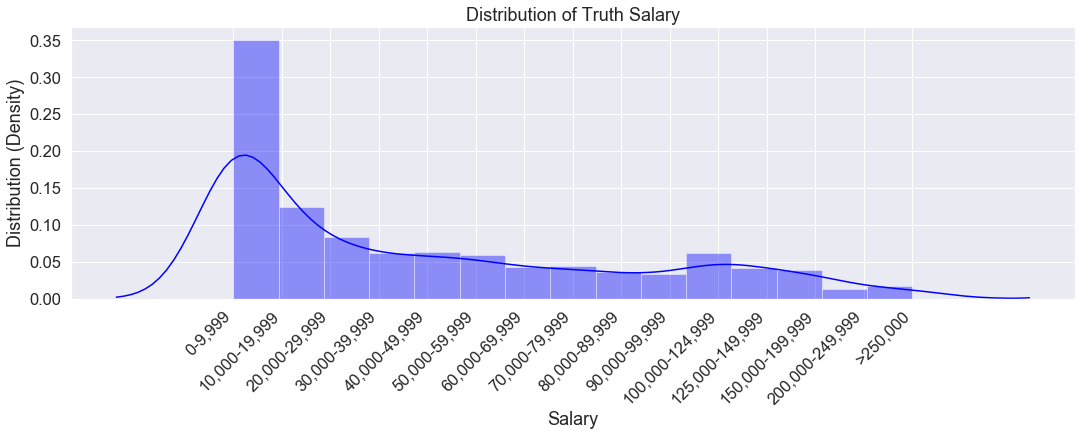

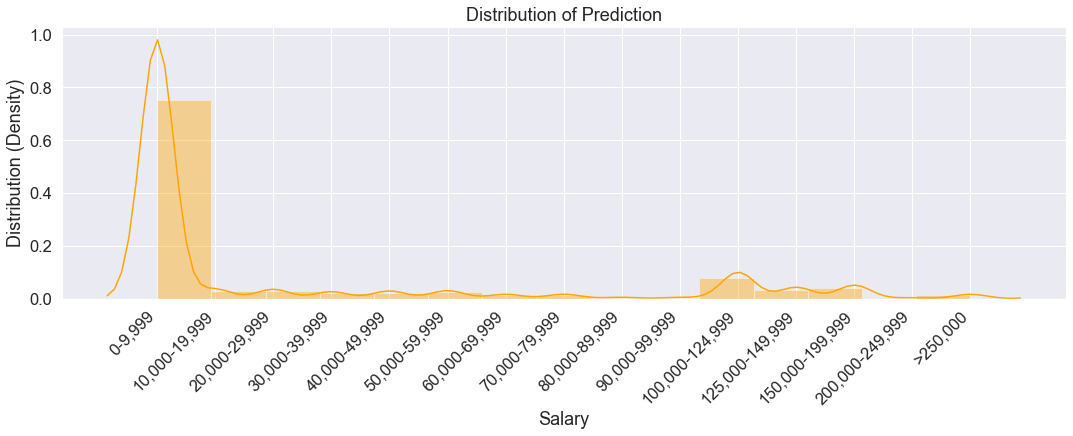

In [77]:
sorted_keys = {'0-9,999':0,'10,000-19,999':1,'20,000-29,999':2,'30,000-39,999':3,'40,000-49,999':4,'50,000-59,999':5,\
               '60,000-69,999':6,'70,000-79,999':7,'80,000-89,999':8,'90,000-99,999':9,'100,000-124,999':10,\
               '125,000-149,999':11,'150,000-199,999':12,'200,000-249,999':13,'>250,000':14}

plt.figure(num=None, figsize=(18,5))
fig = sns.distplot(Y_test,hist=True,bins=15,norm_hist=True,color="blue")
fig.set_xticks(range(0,15))
plt.xticks(plt.xticks()[0], sorted_keys)
plt.xticks(rotation=45, ha="right" )
plt.xlabel("Salary")
plt.ylabel("Distribution (Density)")
plt.title("Distribution of Truth Salary") 
plt.show()

plt.figure(num=None, figsize=(18,5))
fig = sns.distplot(prediction2,hist=True,bins=15,norm_hist=True,color="orange")
fig.set_xticks(range(0,15))
locs, labels = plt.xticks()
plt.xticks(plt.xticks()[0], sorted_keys)
plt.xticks(rotation=45, ha="right" )
plt.xlabel("Salary")
plt.ylabel("Distribution (Density)")
plt.title("Distribution of Prediction") 
plt.show()

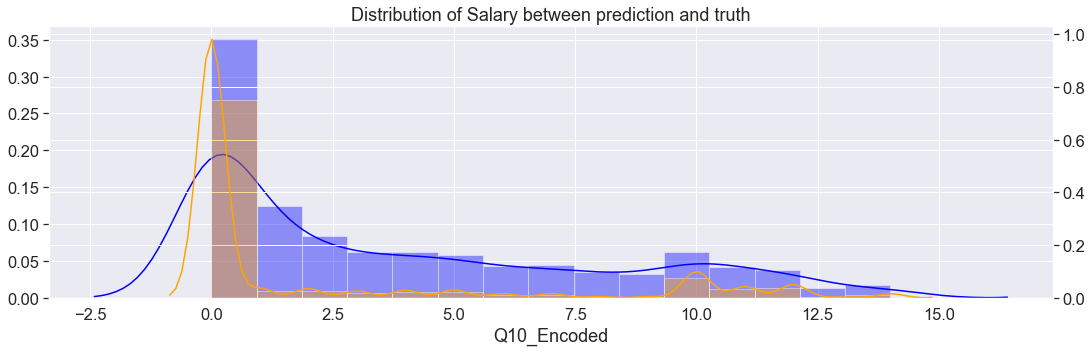

In [78]:
fig, ax = plt.subplots(num=None, figsize=(18,5), facecolor='w', edgecolor='k')
fig=sns.distplot(Y_test,hist=True,bins=15,norm_hist=True,ax=ax,color="blue")
ax2 = ax.twinx()
fig2=sns.distplot(prediction2,hist=True,bins=15,norm_hist=True,ax=ax2,color="orange")
plt.title("Distribution of Salary between prediction and truth") 
plt.show()

## 6.3 Overall fit of the model

#### Our Model is Underfitting.
    We only has 35% accuracy. Our model underfits because logistic regression is too simple with regards to the salary data it is trying to model.

    We use bias–variance approach to see this. From the training and test errors figures from below, the learning curve shows high error on both the training and test sets, so our model is in high bias. 
    Model is underfitted when we have a high bias. 
    Our model is in low variance. For low variance and high bias, we need to improve our model complexity

    Also, we could see from the 5.1 Figure, showing that while with the C value becomes larger, error does not decrease. Thus, it is underfit.

#### How to increase the accuracy
    To provide better salary prediction, we should increase our model complexity, or use other supervised method.

<module 'matplotlib.pyplot' from '/Users/hq/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

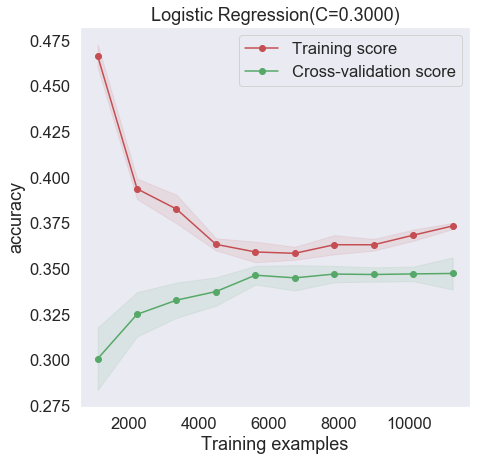

In [79]:
c_best =LogisticRegression(solver='lbfgs',C=minC, multi_class='auto', penalty="l2",dual=False,max_iter=1000)
plot_learning_curve(c_best,'Logistic Regression(C=%.4f)'%minC, X, Y, cv=10)